# CURSO: Programa especializado en ciencia de datos con Python

## Proyecto N° 02

In [260]:
# Cargamos librerías a usar
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1:
Fichero autos.csv

Generar una función y utilizar esta para recodificar la variable “país
de origen” (1, 2, 3) en el dataframe a través de la función apply.

In [197]:
df1 = pd.read_csv('autos.csv') # lectura de fichero
df1.head() # Vemos ejemplo del Df

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,01/01/1970,140.0


In [198]:
df1.info() # Verificamos que no hay nulos para las variable "Pais_Origen"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [199]:
df1['Pais_Origen'].unique() # Vemos valores únicos de la variable

array(['USA', 'Europe', 'Japan'], dtype=object)

In [200]:
df1['Pais_Origen'].value_counts()

USA       254
Japan      79
Europe     73
Name: Pais_Origen, dtype: int64

In [201]:
# Función recodificación
def recodi(df):
    '''
    Función que recodifica los valores de un campo.
    
    Parámetros
    ----------
    df: dataframe en uso
    
    Ejemplo
    -------
    recodi(df1)
    Cambiará los valores actuales por 1, 2, o 3 según sea el caso:
    {'USA': '1', 
     'Europe': '2', 
     'Japan': '3'
     }
    '''
    df2 = df.copy() # Generamos otro Df para la recodificación
    dic = {'USA': '1', 'Europe': '2', 'Japan': '3'} # Definimos un diccionario de apoyo
    df2['Pais_Origen'] = df2['Pais_Origen'].apply(lambda x: dic[x] if x in dic.keys() else '0') # aplicamos la función apply en la misma variable
    
    return df2

In [202]:
df2 = recodi(df1)

print('Valores recodificados:\n')
print(df2['Pais_Origen'].unique()) # Verificamos
df2['Pais_Origen'].value_counts() # Verificamos cantidades

Valores recodificados:

['1' '2' '3']


1    254
3     79
2     73
Name: Pais_Origen, dtype: int64

### Ejercicio 2
Generar un Notebook Colab con código y resultados, que contiene
información de autos de un periodo de tiempo. Resolver los
siguientes:

- Limpieza y tratamiento de las variables (Según corresponda)
- Generar 5 nuevas variables aplicando los siguientes criterios con las variables numéricas:
    1. Log10(var1/var2)
    2. Sqrt(var1)*exp(var2)/200
    3. Si var 1 > var 2 → 5, caso contrario 3
    4. 1/logn(var1/var2)*100
    5. var2**2/var1

#### · Limpieza y tratamiento de las variables (Según corresponda)

In [203]:
df2.info() # Validando nulos y el tipo de dato para cada variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [204]:
# Obteniendo solo el año de la variable "Anyo"
df2['Anyo'] = pd.to_datetime(df2['Anyo']) # Convertimos a date el campo "Anyo"
df2['Anyo'] = df2['Anyo'].dt.year # Nos quedamos solo con el año
df2.sample(6)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
102,12.0,8,1,4951,455.0,11.0,buick electra 225 custom,1973,225.0
348,23.5,6,1,2725,173.0,12.6,chevrolet citation,1982,110.0
30,21.0,6,1,2648,199.0,15.0,amc gremlin,1970,90.0
390,34.0,4,3,2245,108.0,16.9,toyota corolla,1982,70.0
182,29.0,4,2,1937,90.0,14.0,volkswagen rabbit,1975,70.0
47,14.0,8,1,4154,351.0,13.5,ford galaxie 500,1971,153.0


In [205]:
# Imputación de nulos (no paramétrica)
df3 = df2[['Millas_Por_Galon','Caballo_De_Fuerza']]
imputacion_NP = KNNImputer(n_neighbors=2)
df3 = imputacion_NP.fit_transform(df3)
df3 = pd.DataFrame(df3, columns=['Millas_Por_Galon_Imputado','Caballo_De_Fuerza_Imputado'])
df3

,Millas_Por_Galon_Imputado,Caballo_De_Fuerza_Imputado
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
401,27.0,86.0
402,44.0,52.0
403,32.0,84.0
404,28.0,79.0


In [206]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Millas_Por_Galon_Imputado   406 non-null    float64
 1   Caballo_De_Fuerza_Imputado  406 non-null    float64
dtypes: float64(2)
memory usage: 6.5 KB


In [207]:
df4 = pd.concat([df2, df3], axis=1)
df4 = df4.drop(['Millas_Por_Galon','Caballo_De_Fuerza'], axis=1)
df4

,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Millas_Por_Galon_Imputado,Caballo_De_Fuerza_Imputado
0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1970,18.0,130.0
1,8,1,3693,350.0,11.5,buick skylark 320,1970,15.0,165.0
2,8,1,3436,318.0,11.0,plymouth satellite,1970,18.0,150.0
3,8,1,3433,304.0,12.0,amc rebel sst,1970,16.0,150.0
4,8,1,3449,302.0,10.5,ford torino,1970,17.0,140.0
...,...,...,...,...,...,...,...,...,...
401,4,1,2790,140.0,15.6,ford mustang gl,1982,27.0,86.0
402,4,2,2130,97.0,24.6,vw pickup,1982,44.0,52.0
403,4,1,2295,135.0,11.6,dodge rampage,1982,32.0,84.0
404,4,1,2625,120.0,18.6,ford ranger,1982,28.0,79.0


In [208]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cilindros                   406 non-null    int64  
 1   Pais_Origen                 406 non-null    object 
 2   Peso_En_Libras              406 non-null    int64  
 3   Desplazamiento              406 non-null    float64
 4   Aceleracion                 406 non-null    float64
 5   Nombre                      406 non-null    object 
 6   Anyo                        406 non-null    int64  
 7   Millas_Por_Galon_Imputado   406 non-null    float64
 8   Caballo_De_Fuerza_Imputado  406 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.7+ KB


In [209]:
df4.describe()

,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Anyo,Millas_Por_Galon_Imputado,Caballo_De_Fuerza_Imputado
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,5.475369,2979.413793,194.779557,15.519704,1975.995074,23.441995,104.740148
std,1.712160,847.004328,104.922458,2.803359,3.856689,7.874824,38.618212
min,3.000000,1613.000000,68.000000,8.000000,1970.000000,9.000000,46.000000
25%,4.000000,2226.500000,105.000000,13.700000,1973.000000,17.000000,75.000000
50%,4.000000,2822.500000,151.000000,15.500000,1976.000000,22.750000,94.500000
75%,8.000000,3618.250000,302.000000,17.175000,1979.000000,29.000000,129.000000
max,8.000000,5140.000000,455.000000,24.800000,1982.000000,46.600000,230.000000


#### · Generar 5 nuevas variables aplicando los siguientes criterios con las variables numéricas

In [210]:
def fun_math(calculo: str, var1: float=0, var2: float=0) -> float:
    ''' 
    Función que realiza múltiples cálculos, solo debes seleccionar una operación matemática.
    
    Parámetros
    ----------
    calculo: 'log10', 'raíz_cuadrada', 'condicional', 'log_natural', 'exponenciación'.
    var1: variable 1 para el cálculo.
    var2: variable 2 para el cálculo.

    Ejemplos:
    --------
    >>> fun_math(calculo='log10')(var1=10, var2=30)
    '''
    return {
        'log10': lambda var1, var2: np.log10(var1/var2),
        'raíz_cuadrada': lambda var1, var2: np.sqrt(var1)*np.exp(var2)/200,
        'condicional': lambda var1, var2: np.where(var1>var2, 5, 3),
        'log_natural': lambda var1, var2: 1/np.log(var1/var2)*100,
        'exponenciación': lambda var1, var2: var2**2/var1
        }.get(calculo, lambda: None)

In [243]:
df5 = df4.copy()

# Usando las variables "Peso en libras" y "Cilindros" generamos las 5 variables según los criterios indicados
df5 = pd.concat([df5,
                 pd.DataFrame(fun_math('log10')(df5['Peso_En_Libras'], df5['Cilindros']), columns=['Variable1']),
                 pd.DataFrame(fun_math('raíz_cuadrada')(df5['Peso_En_Libras'], df5['Cilindros']), columns=['Variable2']),
                 pd.DataFrame(fun_math('condicional')(df5['Peso_En_Libras'], df5['Cilindros']), columns=['Variable3']),
                 pd.DataFrame(fun_math('log_natural')(df5['Peso_En_Libras'], df5['Cilindros']), columns=['Variable4']),
                 pd.DataFrame(fun_math('exponenciación')(df5['Peso_En_Libras'], df5['Cilindros']), columns=['Variable5'])
                ], axis=1)

df5.sample(6)

,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Millas_Por_Galon_Imputado,Caballo_De_Fuerza_Imputado,Variable1,Variable2,Variable3,Variable4,Variable5
81,8,1,4294,302.0,16.0,ford gran torino (sw),1972,13.0,140.0,2.729772,976.690311,5,15.909551,0.014905
198,6,1,3233,225.0,15.4,plymouth valiant,1976,22.0,100.0,2.731454,114.693749,5,15.899752,0.011135
211,4,3,1990,85.0,17.0,datsun b-210,1976,32.0,70.0,2.696793,12.177958,5,16.104108,0.008040
53,4,1,2408,140.0,19.0,chevrolet vega (sw),1971,22.0,72.0,2.779596,13.396032,5,15.624371,0.006645
388,4,3,2160,120.0,14.5,nissan stanza xe,1982,36.0,88.0,2.732394,12.687464,5,15.894286,0.007407
276,4,1,2230,105.0,14.5,dodge omni,1978,30.9,75.0,2.746245,12.891408,5,15.814121,0.007175


### Ejercicio 3
Crear una función que permita generar 3 variables cualitativas ordinales a partir de las variables numéricas con los siguientes criterios:

    ★ Si es mayor a la “media + 1*desviación estándar” → Alto
    
    ★ Si está entre “media - 1*desviación estándar” y “media + 1*desviación estándar” → Medio

    ★ Si es menor a la “media - 1*desviación estándar” → Bajo

Nota: 
Mostrar con las nuevas variables generadas. Elegir con libertad las variables a trabajar. La función debe contar con su respectiva documentación.

In [244]:
def discretizacion(df, var: str):
    '''
    Criterios
    ---------
    Función para discretizar una variable usando la media y desviación estandar:
        ★ Si es mayor a la “media + 1*desviación estándar” → Alto
        ★ Si está entre “media - 1*desviación estándar” y “media + 1*desviación estándar” → Medio
        ★ Si es menor a la “media - 1*desviación estándar” → Bajo
    
    Parámetros y variables auxiliares
    ---------------------------------
    df: dataframe en uso
    var: nombre de campo o columna del dataframe en string
    
    Obtenemos los puntos de corte para generar los intervalos anteriores:
        - mini: mínimo de la variable en uso
        - corte1: media - 1*desviación estándar (media de la variable en uso)
        - corte2: media + 1*desviación estándar (desviación estándar de la variable en uso)
        - maxi: máximo de la variable en uso
    
    Ejemplo
    -------
    discretizacion(df5, 'Variable1')
    '''
    
    mini = np.min(df[var])
    corte1 = np.mean(df[var]) - 1*np.std(df[var])
    corte2 = np.mean(df[var]) + 1*np.std(df[var])
    maxi = np.max(df[var])
    
    df[var+'_Discretiza'] = pd.cut(df[var],
                                  bins=[mini, corte1, corte2, maxi],
                                  labels=['Bajo', 'Medio', 'Alto']
                                 )
    
    return df

In [245]:
df6 = discretizacion(df5, 'Variable1')
df6.sample(6)

,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Millas_Por_Galon_Imputado,Caballo_De_Fuerza_Imputado,Variable1,Variable2,Variable3,Variable4,Variable5,Variable1_Discretiza
144,8,1,4699,350.0,14.5,buick century luxus (sw),1974,13.0,150.0,2.768915,1021.712207,5,15.684642,0.013620,Medio
313,6,1,2595,173.0,11.3,chevrolet citation,1979,28.8,115.0,2.635986,102.755618,5,16.475598,0.013873,Bajo
32,8,1,4376,307.0,15.0,chevy c20,1970,10.0,200.0,2.737987,985.971851,5,15.861815,0.014625,Medio
241,4,1,2740,151.0,16.0,pontiac sunbird coupe,1977,24.5,88.0,2.835691,14.289703,5,15.315299,0.005839,Alto
294,8,1,3955,351.0,13.2,mercury grand marquis,1979,16.5,138.0,2.694057,937.344215,5,16.120467,0.016182,Medio
297,8,1,4054,351.0,14.3,ford country squire (sw),1979,15.5,142.0,2.704794,949.003320,5,16.056473,0.015787,Medio


### Ejercicio 4
Crear una función que muestre los siguientes gráficos (simultáneamente) para las variables numéricas, según una variable cualitativa:

    ❖ Cajas y bigotes

    ❖ Barras de la media

    ❖ Histograma con Curva

La función debe contar con su respectiva documentación.

In [261]:
df7 = df1.copy()

In [284]:
def graficar(df, var: str):
    '''
    Función que devuelve gráficos de cajas y bigotes, barras de la media, e histograma con curva para variables numéricas
    en base a una variable cualitativa.
    
    Parámetros
    ----------
    df: dataframe en uso.
    var: nombre de campo o columna del dataframe en string

    Salida
    ------
    Devuelve los graficos

    Ejemplos
    --------
    graficar(df7, 'Pais_Origen')
    '''
    var_numericas = df7.select_dtypes(include=['float64', 'int']).columns # Seleccionamos solo las variables numéricas
    fig, ax = plt.subplots(nrows=2, ncols=len(var_numericas), figsize=(35, 15)) # Dividimos la ventana de gráficos

    for i, j in enumerate(var_numericas):
        graf1 = sns.boxplot(data=df, y=j, x=var, ax=ax[0,i])
        graf2 = sns.barplot(data=df, y=j, x=var, estimator=np.mean, ax=ax[1,i])
    
    plt.subplots(nrows=1, ncols=1)
    graf3 = sns.histplot(data=df, x=var, kde=True)

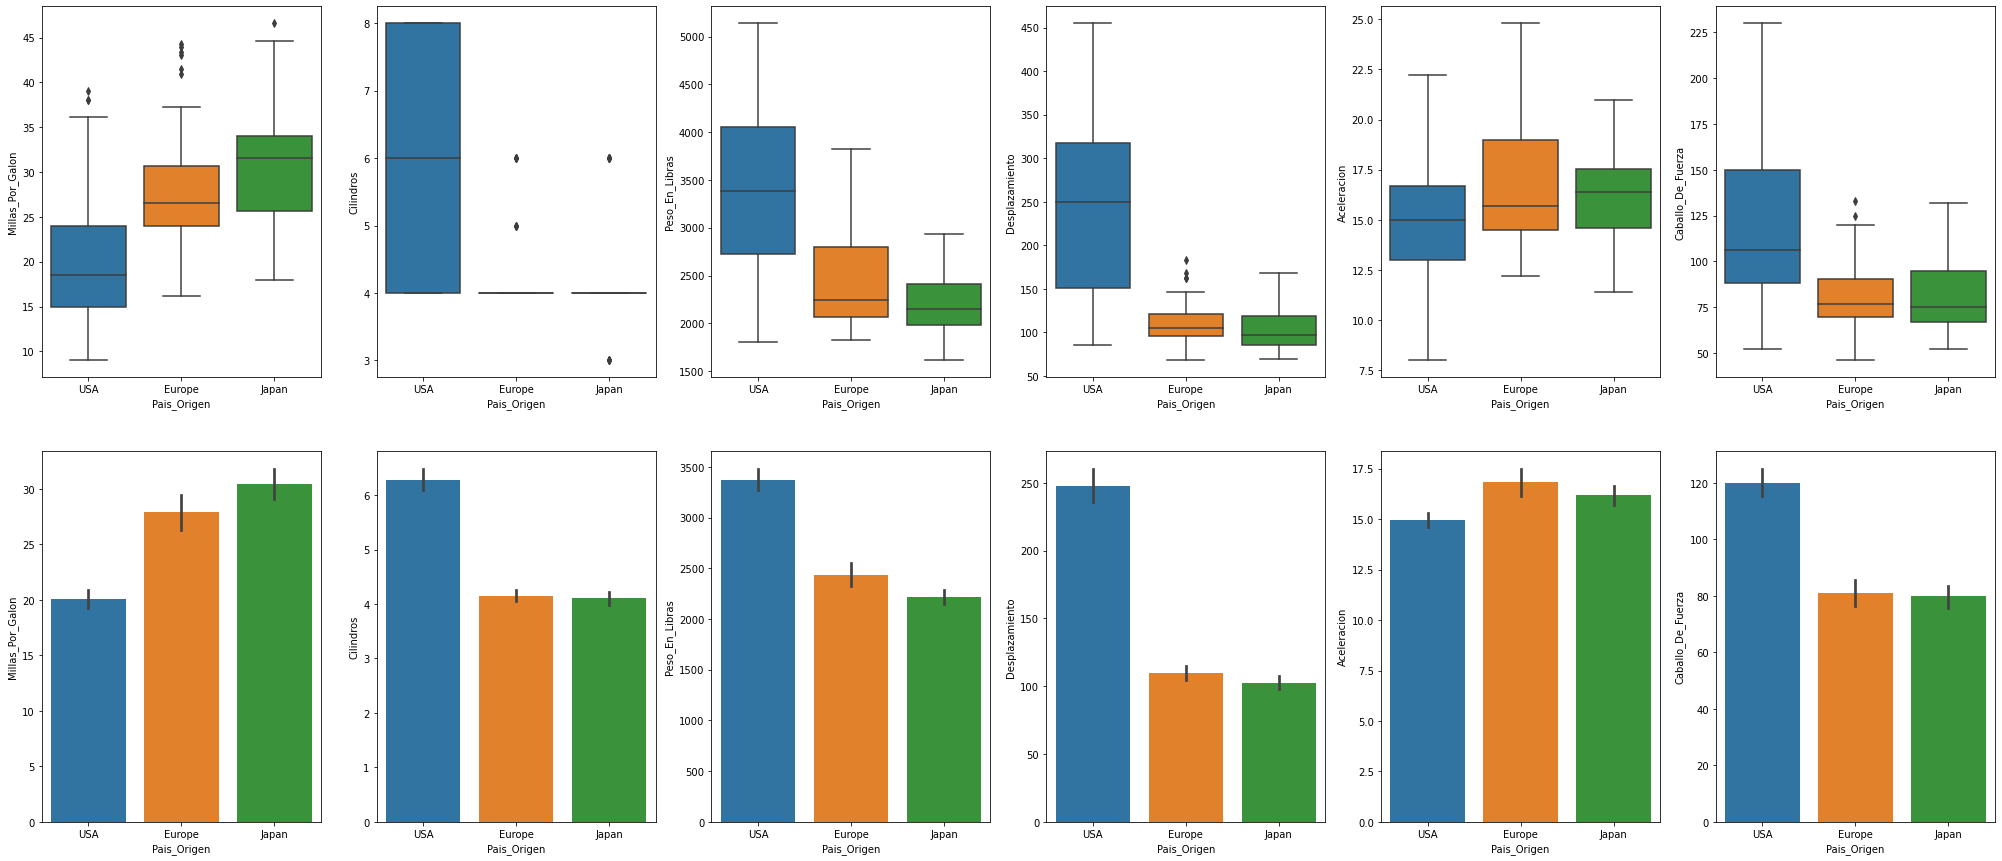

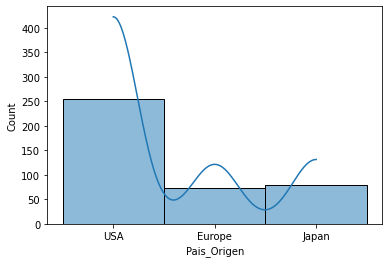

In [285]:
graficar(df7, 'Pais_Origen')

### Ejercicio 5
Crear una función que devuelva un mapa de calor con la correlación de todas las variables numéricas (incluye las generadas), para cada país.

La función debe contar con su respectiva documentación.

<AxesSubplot:>

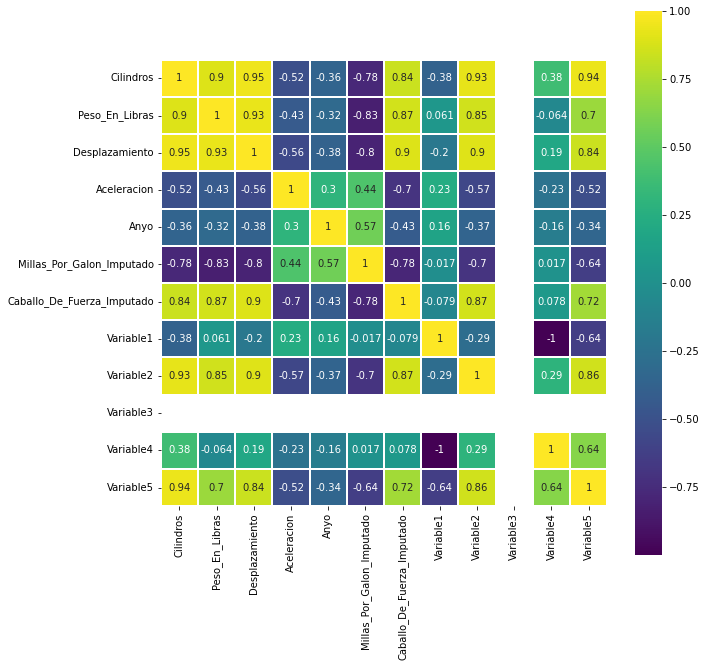

In [288]:
df8 = df6.select_dtypes(include=['float64', 'int']) # Seleccionamos solo las variables numéricas

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df8.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [321]:
def mapa_calor(df, var):
    '''
    Función que devuelve un mapa de calor con la correlación de todas las variables numéricas para cada país
    
    Parámetros
    ----------
    df: dataframe en uso.
    var: nombre de campo o columna del dataframe en string

    Salida
    ------
    Devuelve los graficos

    Ejemplos
    --------
    graficar(df6, 'Pais_Origen')
    '''
    fig, ax = plt.subplots(nrows=len(var.unique()), ncols=1, figsize=(20, 25)) # realizamos un bucle for en donde extraeremos las categorias de la variable cualitativa, en este caso son los países
    
    for i, region in enumerate(var.unique()):
        df8 = df.select_dtypes(include=['float64', 'int']) # Seleccionamos solo las variables numéricas
        correlacion = df.corr()
        mapa = sns.heatmap(correlacion,
                        linewidths=0.1,
                        vmax=1.0,
                        square=True,
                        cmap=colormap,
                        linecolor='white',
                        annot=True,
                        ax=ax[i]
                        )
        mapa.set_title(region) # Ponemos como titulo cada categoria

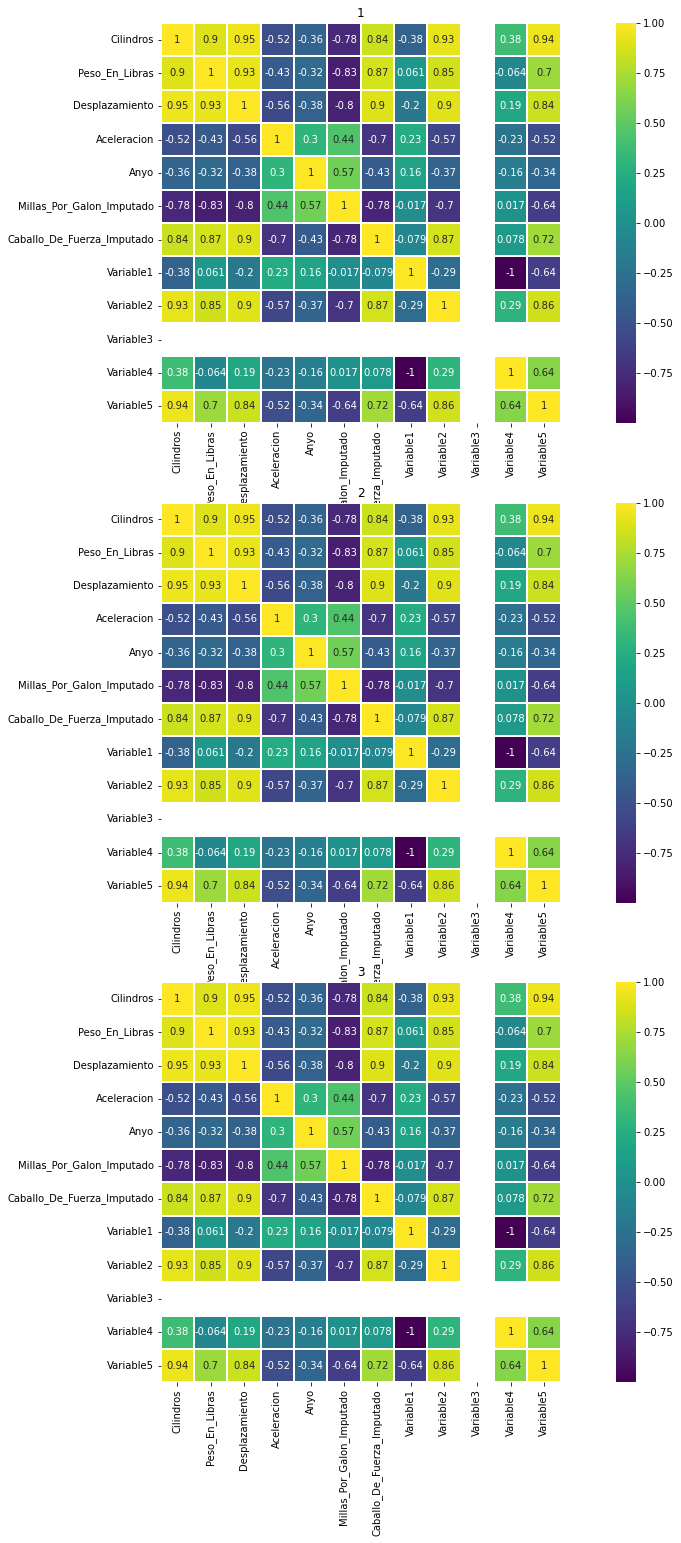

In [322]:
mapa_calor(df6, df6['Pais_Origen'])